In [ ]:
!python --version

!sudo apt-get update -y

!sudo apt-get install python3.7

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

!sudo update-alternatives --config python3

!apt-get install python3-pip

!python -m pip install --upgrade pip --user

!python --version

#Select option 2 to download 3.8.10

Python 3.8.10
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 2s (138 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newes

# Kaggle Download

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.9/195.9 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 20.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaikhatim","key":"c2425ae598a6ce532c5714c12393e8a3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Replace `your-dataset-name` with the dataset name from Kaggle
!kaggle datasets download -d adgarrio/30k-x-ray-sample

100% 11.2G/11.2G [10:07<00:00, 28.9MB/s]
100% 11.2G/11.2G [10:07<00:00, 19.8MB/s]


In [ ]:
!unzip -q 30k-x-ray-sample.zip #Unzip the dataset on colab environment

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Data_Entry_2017.csv')

# Remove rows with ages greater than 101
df = df[df['Patient Age'] <= 101]

# Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_csv_file.csv', index=False)

In [ ]:
import os
import shutil

src_path = Path('/content')
dst_path = src_path / 'all_images'
dst_path.mkdir(parents=True, exist_ok=True)

for i in range(1, 13):
    folder_name = f"images_{str(i).zfill(3)}"
    folder_path = src_path / folder_name / 'images'
    for img_file in folder_path.glob('*.*'):
        shutil.copy(img_file, dst_path)

In [ ]:
for i in range(1, 13):
    folder_name = f"images_{str(i).zfill(3)}"
    folder_path = src_path / folder_name
    shutil.rmtree(folder_path)

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
path = Path('/content')
df = pd.read_csv(path / "Data_Entry_2017.csv")

# Extract unique pathological conditions
pathological_conditions = df['Finding Labels'].str.split('|').explode().unique().tolist()

print(pathological_conditions)

sample_size_per_condition = 7500 // len(pathological_conditions)
rows = []

for condition in pathological_conditions:
    condition_df = df[df['Finding Labels'].str.contains(condition)]
    sampled_rows = condition_df.sample(min(sample_size_per_condition, len(condition_df)), random_state=42)
    rows.extend(sampled_rows.to_dict('records'))

balanced_df = pd.DataFrame(rows)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the new balanced dataframe to a CSV file
balanced_df.to_csv(path / 'balanced_data_entry.csv', index=False)

['Cardiomegaly', 'Emphysema', 'Effusion', 'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']


# FastAi Model

In [ ]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from fastai.vision.all import *
from fastai.callback.all import *

# Load the dataset
path = Path('/content/30K-Dataset')
df = pd.read_csv("/content/updated_30K-Dataset.csv")

def get_x(r): return path/r['Image Index']
def get_y(r): return r['Finding Labels'].split('|')
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
    get_x = get_x, 
    get_y = get_y, 
    splitter = RandomSplitter(),
    batch_tfms = [*aug_transforms(size= 224),Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(df, bs=16)

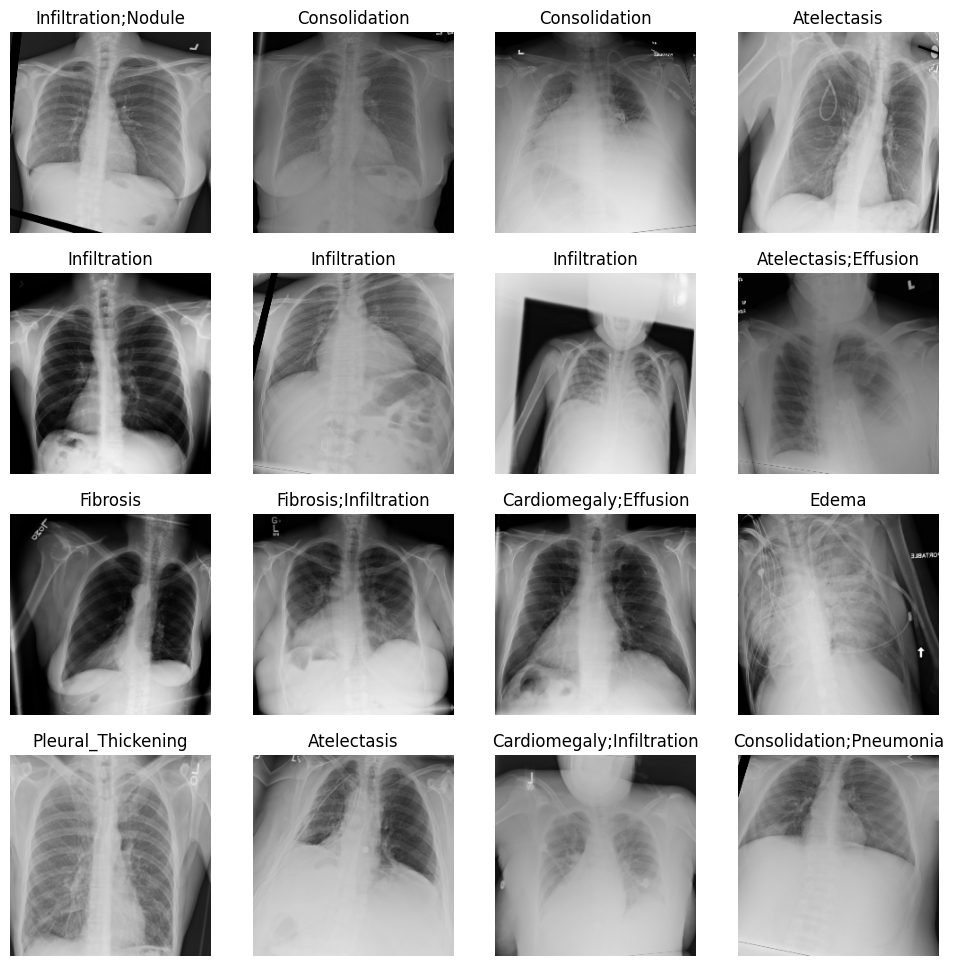

In [ ]:
dls.show_batch(max_n=16)

In [ ]:
# Train the model
learn = cnn_learner(dls,resnet152, metrics=partial(accuracy_multi, thresh=0.55))
learn.fine_tune(3, base_lr = 3e-3, freeze_epochs = 4)

model_save_path = Path('/content/gdrive/My Drive/colab')
model_save_path.mkdir(parents=True, exist_ok=True)
learn.save(model_save_path / 'patho_sample_3810_v2.pkl')

# learn = cnn_learner(dls, resnet152, metrics=accuracy)
# learn.fit_one_cycle(4, 3e-3)
# learn.unfreeze()
# learn.fit_one_cycle(8, lr_max=slice(1e-5, 1e-3))

# model_save_path = Path('/content/gdrive/My Drive/colab')
# model_save_path.mkdir(parents=True, exist_ok=True)
# learn.save(model_save_path / 'patho_sample_3810_v1.pkl')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.471280,0.332696,0.881440,05:40
1,0.319364,0.299229,0.887939,05:37
2,0.306473,0.294827,0.887913,05:33
3,0.291030,0.279925,0.892485,05:28


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.289202,0.280602,0.891098,05:46


In [ ]:
!python --version

Python 3.8.10


In [ ]:
learn.export(model_save_path / 'pathological_model_3810_v1.pkl')


In [ ]:
!pip install Path
!pip install fastai

In [ ]:
from pathlib import Path
from fastai.vision import load_learner

model_path = Path('/content/gdrive/MyDrive/colab/patho_sample_3810_v1.pkl')
learn_inf = load_learner(model_path)

from PIL import Image

img_path = Path("/content/00000003_002 (1).png")
img = Image.open(img_path)
img.show()

preds, _, probs = learn_inf.predict(img)

for i, (label, prob) in enumerate(zip(learn_inf.dls.vocab, probs)):
    print(f"{label}: {prob:.4f}")

# import matplotlib.pyplot as plt

# # Data
# labels = learn_inf.dls.vocab
# sizes = [prob.item() for prob in probs]

# # Filter data to include only values above 0.5
# filtered_labels = [label for label, size in zip(labels, sizes) if size > 0.3]
# filtered_sizes = [size for size in sizes if size > 0.3]

# # Plot the pie chart
# fig, ax = plt.subplots()
# ax.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
# ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# plt.show()


ImportError: ignored